## Aula 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
# tendencia - direção
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra de sinal

In [3]:
df_path = ('https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv')

In [4]:
df = pd.read_csv(df_path)
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
df.index = pd.to_datetime(df.DATE, format='%m-%d-%Y') #type: ignore

In [7]:
df.drop('DATE', inplace=True, axis=1)

In [8]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [9]:
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

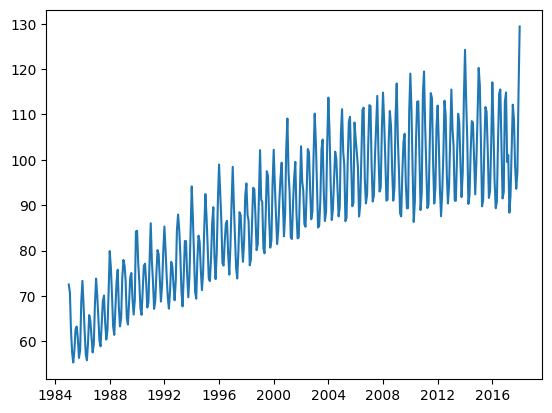

In [10]:
plt.plot(df.index, df.Value)

In [11]:
resultados = seasonal_decompose(df)

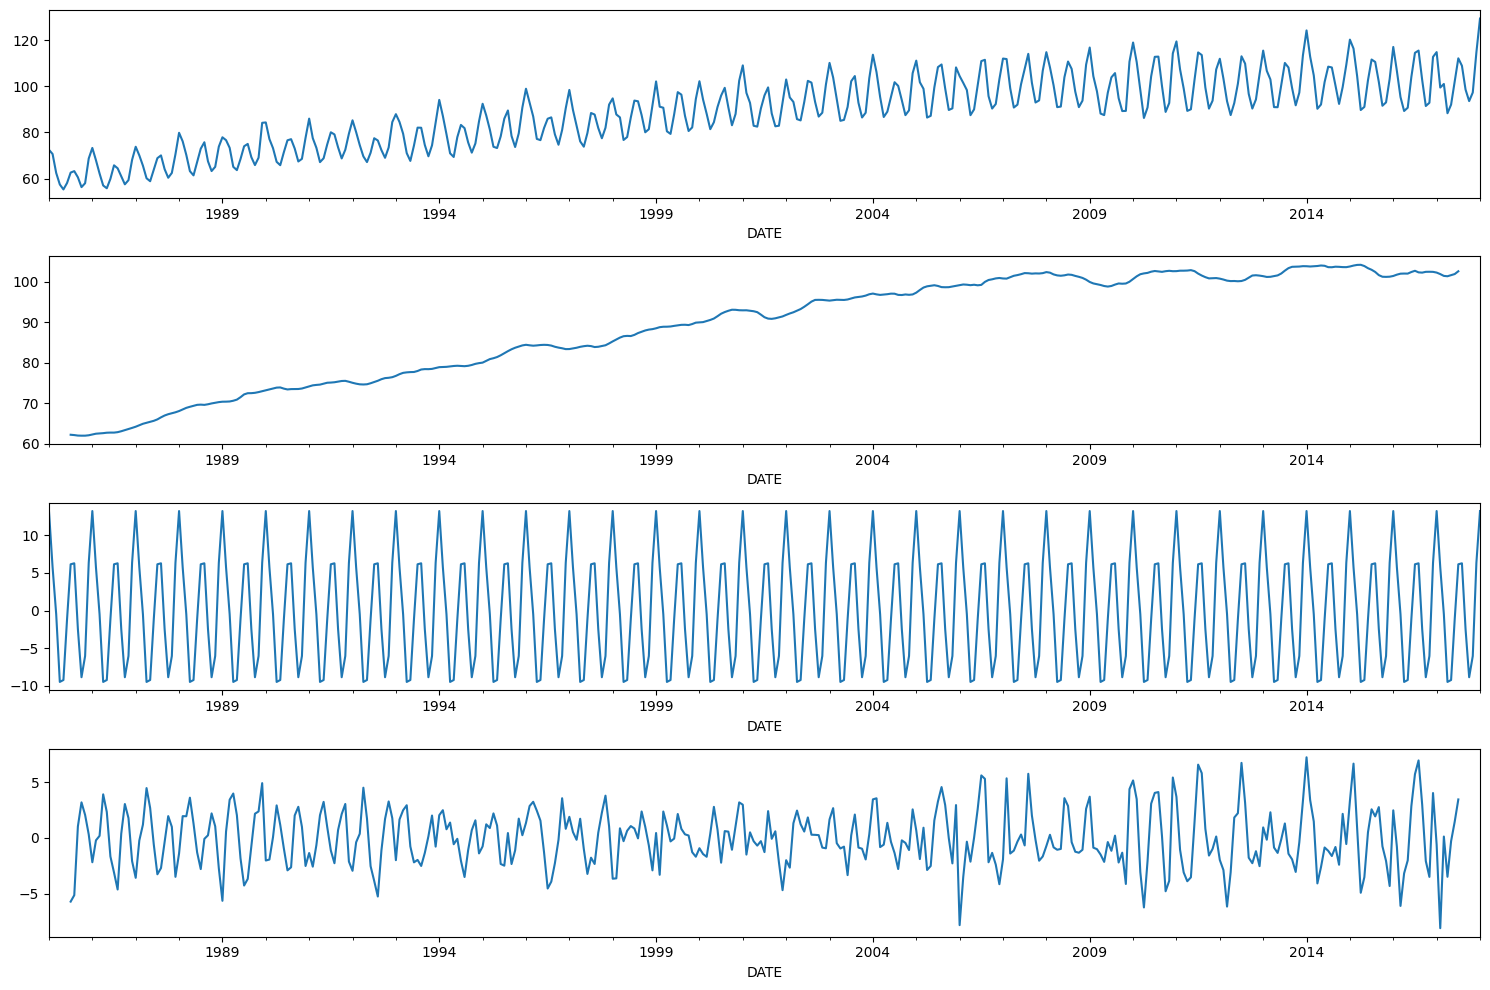

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [13]:
# Sério estacionária ou não estacionária

# Testes

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p-value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [14]:
sns.set_style('darkgrid')

In [15]:
X = df.Value.values

In [16]:
result = adfuller(X)

print('Teste ADf')
print(f'Teste estatistico: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Valores criticos:')

for key, value in result[4].items(): #type: ignore
    print(f'\t{key}: {value}')

Teste ADf
Teste estatistico: -2.2569903500472344
P-Value: 0.18621469116587125
Valores criticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


## Aula 2

In [17]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE')
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [19]:
# dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True) #converter tipo

In [20]:
df.loc['2000-05-01']

Value    84.4552
Name: 2000-05-01 00:00:00, dtype: float64

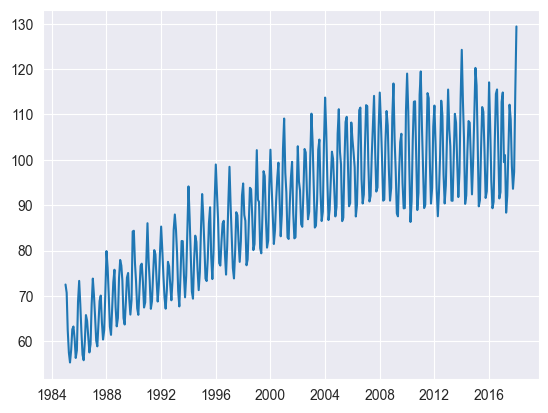

In [21]:
plt.plot(df.index, df.Value)

In [22]:
resultados = seasonal_decompose(df)

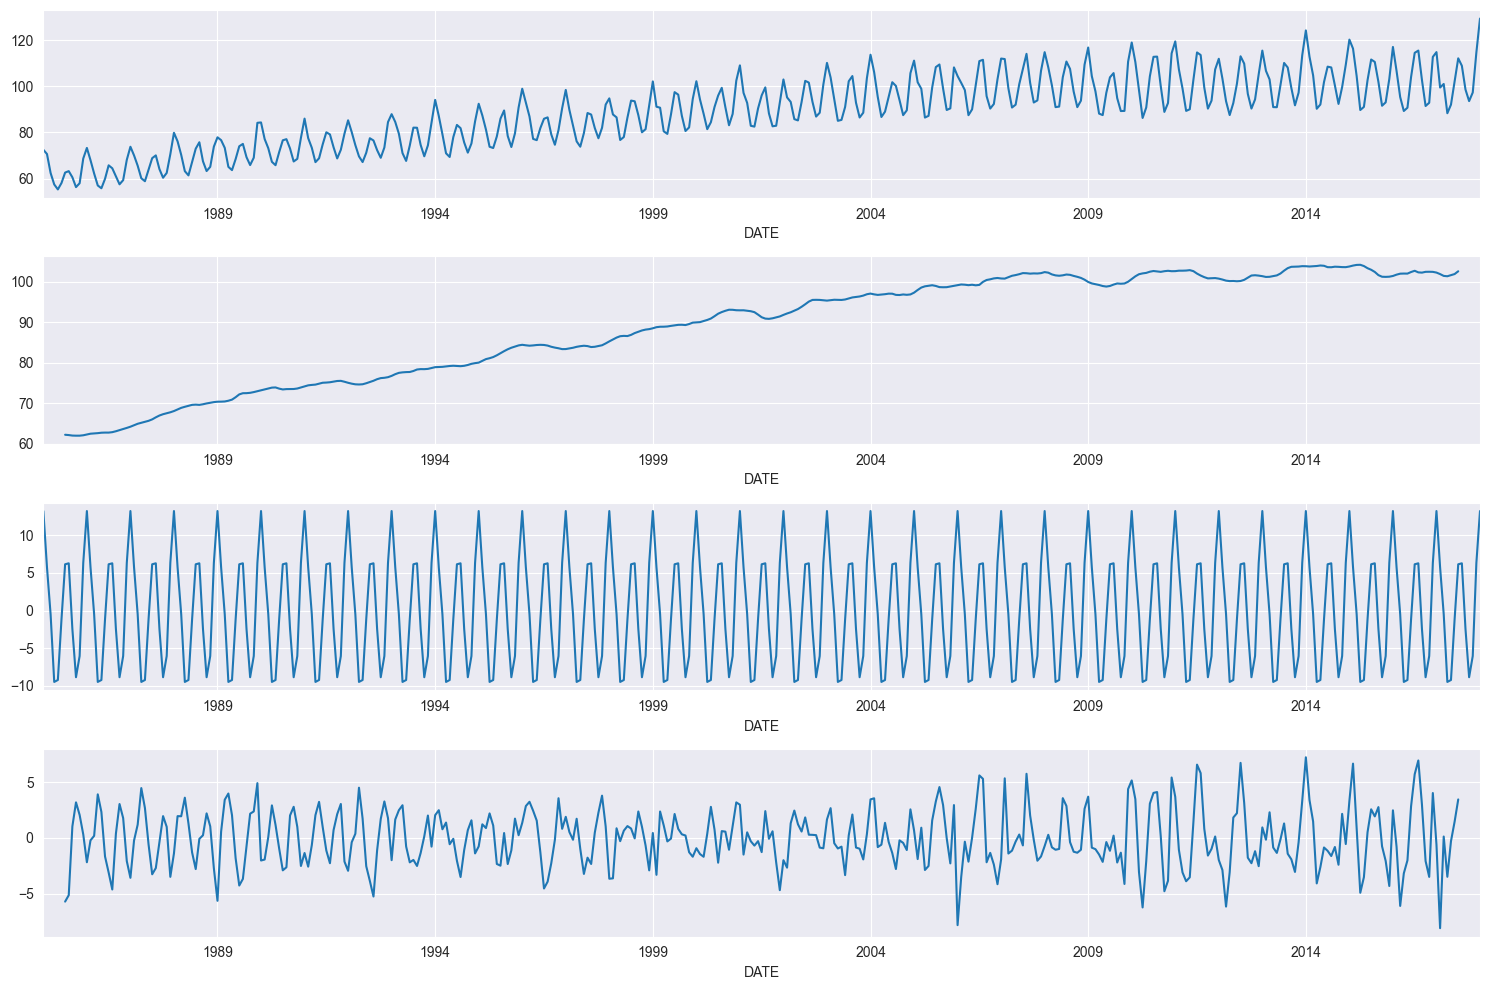

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

## Aula 3

In [24]:
# Prophet